In [7]:
library(dplyr)
library(class)
library(tidyverse)
library(pROC)
library(glmnet)
library(MASS)
#install.packages('glmnetUtils')
library(glmnetUtils)

#install.packages("Rtsne")
library(Rtsne)
#install.packages("plotly")
library(plotly)

also installing the dependencies ‘htmlwidgets’, ‘crosstalk’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘plotly’

The following object is masked from ‘package:MASS’:

    select

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
lasso_pred <- readRDS("../../data/ATAC_predictions_train_XX_predict_XX/ATAC_pred_lasso_normalized_trimmed_formatted_standardized.rds")

In [3]:
head(lasso_pred)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,sample,chr10_400,chr10_40,chr10_4,chr10_401,chr10_402,chr10_403,chr10_404,chr10_405,chr10_406,...,chr9_39,chr9_391,chr9_392,chr9_393,chr9_394,chr9_395,chr9_396,chr9_397,chr9_398,chr9_399
V1,PGDX16568P,0.7621097,-0.8032188,0.6402487,-0.8688929,-0.4792134,-0.5096581,0.02594817,0.7295906,0.7738027,...,-0.405123632,0.59187320,-0.29125018,-0.58276010,0.3792968,-0.04366948,0.9183014,0.7664238,0.9980457,-1.0572778
V2,PGDX16569P,0.7057109,-0.8227554,0.7868749,-1.0407754,-0.9284673,-0.4139074,-0.16594560,0.7765621,0.5761691,...,-0.849313481,0.39431325,0.05197526,-0.36318168,0.1744439,-0.13785162,0.5392077,0.3942941,1.7972449,-0.3619464
V3,PGDX16570P,0.4891340,-1.1448217,0.9478602,-1.0930696,-0.5115270,-0.7552269,-0.48824613,0.9537215,0.6624865,...,-0.871941533,-0.06389996,-0.22907645,-0.32470631,-0.6251958,0.17051719,0.6882020,0.1744819,1.4357406,-0.2330366
V4,PGDX16571P,0.6882727,-0.8585679,0.6248431,-0.8310281,-0.5335804,-0.5125528,-0.34185944,0.9281618,0.4768828,...,-0.005893625,0.18185487,0.32387927,0.04577069,0.2752394,0.22750427,0.6333635,0.8413436,1.2819797,0.5629469
V5,PGDX16579P,0.5801896,-1.1674832,0.7883376,-1.0498406,-1.2475692,-0.7345196,-0.18778863,0.2546093,0.2920616,...,-0.067895629,-0.05197828,-0.18308631,-0.70242368,-0.4281903,-0.06235782,1.0764914,1.1411410,0.8795170,-0.4910720
V6,PGDX16580P,0.6831409,-0.8712906,0.7199476,-1.1853489,-0.8520159,-0.6829992,-0.35499242,0.8598551,0.3870744,...,-0.735310376,0.36325245,0.20814984,-0.50307962,0.2609116,0.53933999,1.0772367,0.6906960,1.7696570,-0.4181884


In [4]:
#tSNE

In [8]:
#Try different perplexities and plot
sne_results <- tibble(perplexity = numeric(),
                      x = numeric(),
                      y = numeric())

for (per in c(1, 2, 3, 4, 5, 7, 10, 20, 40)) {
  sne <- Rtsne(lasso_pred, perplexity=per, check_duplicates = FALSE)$Y
  sne_results <- bind_rows(sne_results, tibble(perplexity = per,
                                  x = sne[,1],
                                  y = sne[,2]))
}

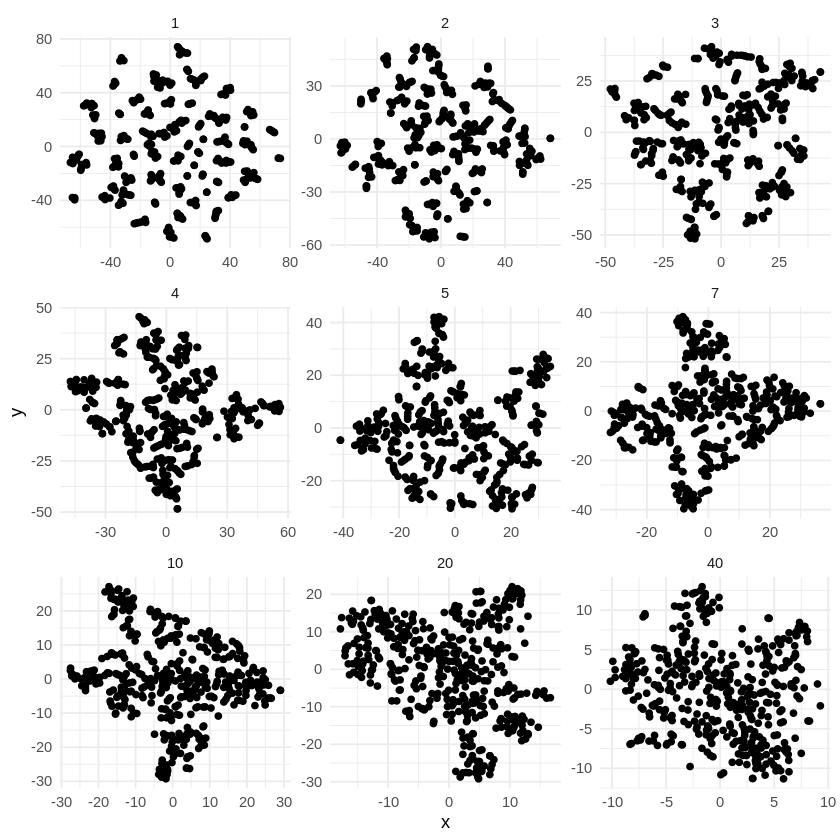

In [9]:
sne_results %>% ggplot() +
  geom_point(aes(x, y)) +
  facet_wrap(~perplexity, scales = 'free') +
  theme_minimal()

In [49]:
sne <- Rtsne(lasso_pred, per=2, check_duplicates = FALSE)$Y

In [50]:
sne

6.568331,17.3253827
-45.503459,5.1515166
-16.475363,15.0334071
1.724912,-21.6896464
-2.681796,-53.0785914
-4.059485,-18.7537845
-35.676381,-9.9842200
-17.736615,15.6369936
1.916046,46.6388309
-18.602278,-17.3580956
-10.607669,13.1253708


In [51]:
sample_names <- as.data.frame(lasso_pred$sample)
colnames(sample_names) <- c("sample")

In [52]:
head(sample_names)

sample
PGDX16568P
PGDX16569P
PGDX16570P
PGDX16571P
PGDX16579P
PGDX16580P


In [53]:
ATAC_pred <- cbind(sample_names, sne)

In [54]:
head(ATAC_pred)

sample,1,2
PGDX16568P,6.568331,17.325383
PGDX16569P,-45.503459,5.151517
PGDX16570P,-16.475363,15.033407
PGDX16571P,1.724912,-21.689646
PGDX16579P,-2.681796,-53.078591
PGDX16580P,-4.059485,-18.753785


In [55]:
#ATAC_pred <- lasso_pred

In [56]:
sample_types <- read.table("../../data/sample_types.txt", header = F, sep = " ")
colnames(sample_types) <- c("sample", "sample_type")
head(sample_types)

sample,sample_type
PGDX10344P1,Gastric_cancer
PGDX10346P1,Gastric_cancer
PGDX10349P1,Gastric_cancer
PGDX10351P1,Gastric_cancer
PGDX10566P,Ovarian_Cancer
PGDX10567P,Ovarian_Cancer


In [57]:
data <- merge(ATAC_pred, sample_types, by="sample")
data <- data %>% mutate(sample_type01 = ifelse(sample_type == "Healthy", 0, 1))
head(data)

sample,1,2,sample_type,sample_type01
PGDX10344P1,-19.560875,-16.796604,Gastric_cancer,1
PGDX10346P1,30.803999,-21.999839,Gastric_cancer,1
PGDX10349P1,-43.210275,25.226655,Gastric_cancer,1
PGDX10351P1,19.321007,-22.177992,Gastric_cancer,1
PGDX10566P,8.428967,-34.846454,Ovarian_Cancer,1
PGDX10567P,-42.356292,3.369043,Ovarian_Cancer,1


In [58]:
data <- data %>% dplyr::select(-sample_type)

In [59]:
data <- data %>% dplyr::select(-sample)
head(data)

1,2,sample_type01
-19.560875,-16.796604,1
30.803999,-21.999839,1
-43.210275,25.226655,1
19.321007,-22.177992,1
8.428967,-34.846454,1
-42.356292,3.369043,1


In [60]:
#Try different perplexities and plot
#sne_results <- tibble(perplexity = numeric(),
#                      x = numeric(),
#                      y = numeric(),
#                     sample_type01 = character())

#for (per in c(1, 2, 3, 4, 5, 7, 10, 20, 40)) {
#  sne <- Rtsne(data, perplexity=per, check_duplicates = FALSE)$Y
#  sne_results <- bind_rows(sne_results, tibble(perplexity = per,
#                                  x = sne[,1],
#                                  y = sne[,2],
#                                  sample_type01 = as.character(data$sample_type01)))}

In [61]:
#sne_results %>% ggplot() +
#  geom_point(aes(x, y, color = sample_type01)) +
#  facet_wrap(~perplexity, scales = 'free') +
#  theme_minimal()

In [62]:
cross_validation <- function(dataset, k_inner_cv, k_outer_cv){
    
    observed  <- dataset$sample_type01
    return_tibble <- tibble(observed = observed)
    
    for (i in 1:k_outer_cv){ # repeated Cross-validation loop
        set.seed(i)
        cvfolds <- cut(seq_len(nrow(dataset)), breaks = k_inner_cv, labels = F)
        cvfolds <- sample(cvfolds)

        predicted <- rep(NA, nrow(dataset))

        for (n in 1:k_inner_cv){
            rows      <- which(cvfolds==n)
            testdata  <- dataset[rows,]
            testlabels <- testdata$sample_type01
            testdata <- testdata %>% dplyr::select(-sample_type01)

            traindata <- dataset[-rows,]
            trainlabels <- traindata$sample_type01
            #traindata <- traindata %>% dplyr::select(-sample_type01)


            fit       <- lda(sample_type01 ~ ., data=traindata)
            prediction <- predict(fit, testdata)
            predicted[rows] <- prediction$posterior[,2]
        }
        
    current_round_tibble <- tibble(predicted = predicted)
    return_tibble <- cbind(return_tibble, current_round_tibble)
    } # end of outer cv loop

    return(return_tibble)
}

In [63]:
results <- as.data.frame(cross_validation(data, k_inner_cv = 10, k_outer_cv = 10))

In [64]:
results <- tibble(results, .name_repair = "unique")
head(results)

New names:
* predicted -> predicted...2
* predicted -> predicted...3
* predicted -> predicted...4
* predicted -> predicted...5
* predicted -> predicted...6
* ...


observed,predicted...2,predicted...3,predicted...4,predicted...5,predicted...6,predicted...7,predicted...8,predicted...9,predicted...10,predicted...11
1,0.6523304,0.6733441,0.6723033,0.6464101,0.6716326,0.6631503,0.6580038,0.6569081,0.6803192,0.6658040
1,0.4094843,0.3850503,0.3813644,0.3924455,0.3999664,0.3793733,0.3745364,0.4029100,0.4104253,0.4226997
1,0.7243904,0.7440997,0.7455510,0.7187234,0.7239636,0.7234051,0.7328710,0.7460589,0.7574976,0.7429312
1,0.4770758,0.4636955,0.4552021,0.4434338,0.4661828,0.4814327,0.4586945,0.4568310,0.4463254,0.4709122
1,0.5266263,0.5311976,0.5319937,0.5332517,0.5306688,0.5127901,0.5307300,0.5401738,0.5431544,0.5888030
1,0.7468022,0.7591735,0.7488909,0.7626724,0.7460583,0.7435328,0.7536522,0.7632466,0.7449700,0.7511181


In [65]:
 saveRDS(results, file = "PCA_Lasso")

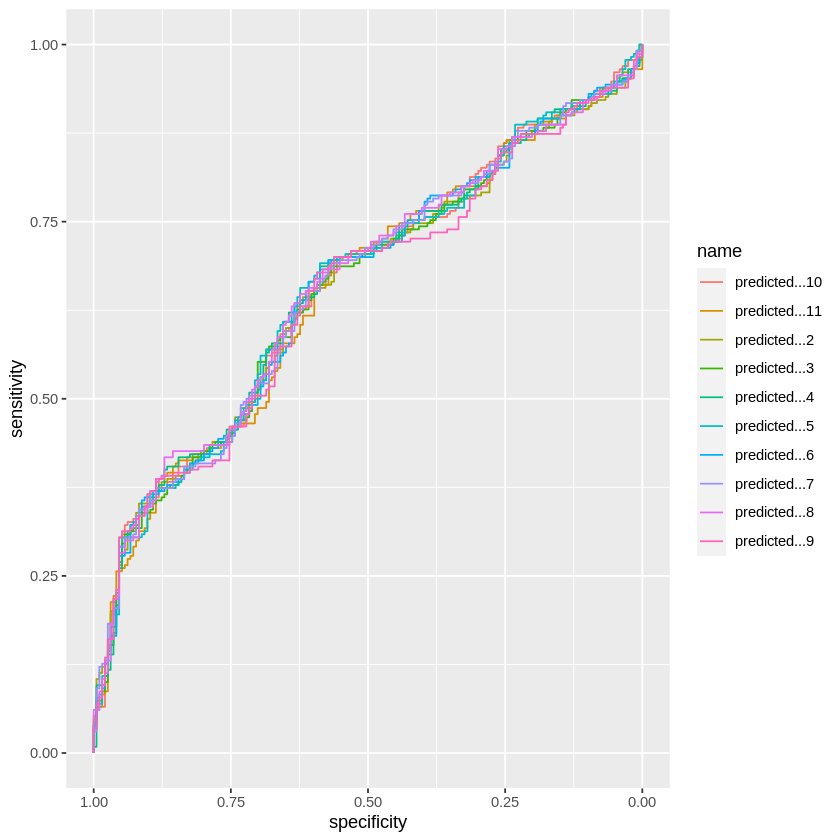

In [66]:
# Create multiple curves to plot
rocs <- roc(observed ~ predicted...2 + 
                    predicted...3 + 
                    predicted...4 + 
                    predicted...5 + 
                    predicted...6 +
                    predicted...7 +
                    predicted...8 + 
                    predicted...9 + 
                    predicted...10 + 
                    predicted...11, data = results)
ggroc(rocs)

In [67]:

dim(results$observed)

NULL

In [68]:
roc1 <- roc(results$observed, results$predicted...2)
roc2 <- roc(results$observed, results$predicted...3)
roc3 <- roc(results$observed, results$predicted...4)
roc4 <- roc(results$observed, results$predicted...5)
roc5 <- roc(results$observed, results$predicted...6)
roc6 <- roc(results$observed, results$predicted...7)
roc7 <- roc(results$observed, results$predicted...8)
roc8 <- roc(results$observed, results$predicted...9)
roc9 <- roc(results$observed, results$predicted...10)
roc10 <- roc(results$observed, results$predicted...11)

In [69]:
paste("Mean AUC over 10 repetitions of 10-fold CV: ", mean(c(roc1$auc, roc2$auc, roc3$auc, roc4$auc, roc5$auc, roc6$auc, roc7$auc, roc8$auc, roc9$auc, roc10$auc)), sep = "")

[1] "Mean AUC over 10 repetitions of 10-fold CV: 0.654878978036755"

In [70]:
results_01 <- results %>% mutate(predicted...2_01 = ifelse(predicted...2 > 0.5, 1, 0), 
                                 predicted...3_01 = ifelse(predicted...3 > 0.5, 1, 0), 
                                 predicted...4_01 = ifelse(predicted...4 > 0.5, 1, 0),
                                 predicted...5_01 = ifelse(predicted...5 > 0.5, 1, 0),
                                 predicted...6_01 = ifelse(predicted...6 > 0.5, 1, 0),
                                 predicted...7_01 = ifelse(predicted...7 > 0.5, 1, 0),
                                 predicted...8_01 = ifelse(predicted...8 > 0.5, 1, 0),
                                 predicted...9_01 = ifelse(predicted...9 > 0.5, 1, 0),
                                 predicted...10_01 = ifelse(predicted...10 > 0.5, 1, 0),
                                 predicted...11_01 = ifelse(predicted...11 > 0.5, 1, 0))

In [71]:
error_rates <- c(mean(results_01$observed != results_01$predicted...2_01), 
                mean(results_01$observed != results_01$predicted...3_01),
               mean(results_01$observed != results_01$predicted...4_01),
               mean(results_01$observed != results_01$predicted...5_01),
               mean(results_01$observed != results_01$predicted...6_01),
               mean(results_01$observed != results_01$predicted...7_01),
               mean(results_01$observed != results_01$predicted...8_01),
               mean(results_01$observed != results_01$predicted...9_01), 
               mean(results_01$observed != results_01$predicted...10_01), 
               mean(results_01$observed != results_01$predicted...11_01))

error_rates

paste("Mean error rate over 10 repetitions of 10-fold CV: ", mean(error_rates), sep = "")

[1] 0.3844340 0.3867925 0.3797170 0.3820755 0.3773585 0.3844340 0.3750000
 [8] 0.3867925 0.3726415 0.3750000

[1] "Mean error rate over 10 repetitions of 10-fold CV: 0.380424528301887"

In [48]:
accuracies <- c(mean(results_01$observed == results_01$predicted...2_01),
               mean(results_01$observed == results_01$predicted...3_01), 
               mean(results_01$observed == results_01$predicted...4_01),
               mean(results_01$observed == results_01$predicted...5_01),
               mean(results_01$observed == results_01$predicted...6_01),
               mean(results_01$observed == results_01$predicted...7_01),
               mean(results_01$observed == results_01$predicted...8_01),
               mean(results_01$observed == results_01$predicted...9_01), 
               mean(results_01$observed == results_01$predicted...10_01), 
               mean(results_01$observed == results_01$predicted...11_01))

accuracies
paste("Mean accuracy over 10 repetitions of 10-fold CV: ", mean(accuracies), sep = "")

[1] 0.6132075 0.5966981 0.6132075 0.6061321 0.6155660 0.6108491 0.6202830
 [8] 0.6084906 0.6061321 0.6132075

[1] "Mean accuracy over 10 repetitions of 10-fold CV: 0.610377358490566"